###  Importing the Relevant Libraries


In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
Data = pd.read_csv('train_s3TEQDk.csv')

Test = pd.read_csv('test_mSzZ8RL.csv')

Data1=Data

target = Data['Is_Lead']

Data = Data.drop(['Is_Lead','ID','Region_Code'],axis=1)

Test = Test.drop(['ID','Region_Code'],axis=1)



### Data Inspection

In [3]:
### Step 2: Data Inspection# 245725 entries,(total 8 columns): spreated the target value

Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Occupation           245725 non-null  object
 3   Channel_Code         245725 non-null  object
 4   Vintage              245725 non-null  int64 
 5   Credit_Product       216400 non-null  object
 6   Avg_Account_Balance  245725 non-null  int64 
 7   Is_Active            245725 non-null  object
dtypes: int64(3), object(5)
memory usage: 15.0+ MB


In [4]:
#105312  entries,(total 8 columns):

Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Occupation           105312 non-null  object
 3   Channel_Code         105312 non-null  object
 4   Vintage              105312 non-null  int64 
 5   Credit_Product       92790 non-null   object
 6   Avg_Account_Balance  105312 non-null  int64 
 7   Is_Active            105312 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.4+ MB


In [5]:
Data.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [6]:
Data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,Other,X3,43,No,1045696,No
1,Female,30,Salaried,X1,32,No,581988,No
2,Female,56,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,Salaried,X1,19,No,470454,No
4,Female,30,Salaried,X1,33,No,886787,No


In [7]:
print("Lets look at Ratio of majority to minority")
print(target.value_counts())
print('imbalanced data set')
print('******************************************')

print('0 : Customer is not interested')

print('1 : Customer is interested')

Lets look at Ratio of majority to minority
0    187437
1     58288
Name: Is_Lead, dtype: int64
imbalanced data set
******************************************
0 : Customer is not interested
1 : Customer is interested


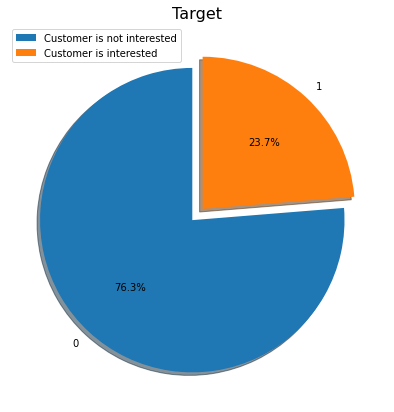

In [8]:
#pie chart for the target value

plt.figure(figsize= (12,7))
df_target= target.value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', startangle= 90, explode= [0.05, 0.05], shadow = True )
plt.legend(['Customer is not interested', 'Customer is interested'])
plt.title('Target', fontsize= 16)

plt.show()

In [9]:
#number of unique values in Data 
Data.apply(pd.Series.nunique)


Gender                      2
Age                        63
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
dtype: int64

In [10]:
Test.apply(pd.Series.nunique)

Gender                     2
Age                       62
Occupation                 4
Channel_Code               4
Vintage                   66
Credit_Product             2
Avg_Account_Balance    78315
Is_Active                  2
dtype: int64

In [11]:
#lot of extra_cat that will hamper the model
pd.crosstab(Data1['Region_Code'], Data1['Is_Lead'],normalize='columns')

Is_Lead,0,1
Region_Code,,
RG250,0.011220,0.006742
RG251,0.024376,0.023693
RG252,0.019708,0.010156
RG253,0.007346,0.008252
RG254,0.112715,0.098013
RG255,0.008264,0.008046
RG256,0.013050,0.006880
RG257,0.026308,0.020073
RG258,0.008115,0.007377


In [12]:

## segregating as per the type - Train

quantitative_data = [i for i in Data if Data[i].dtype == np.int64]

print("A total of {} quantitative columns are in data".format(len(quantitative_data)))
print('\n',quantitative_data,'\n')

qualitative_data = [i for i in Data if Data[i].dtype == np.object]

print("A total of {} object columns are in data".format(len(qualitative_data)))

print('\n',qualitative_data,'\n')


A total of 3 quantitative columns are in data

 ['Age', 'Vintage', 'Avg_Account_Balance'] 

A total of 5 object columns are in data

 ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'] 



In [13]:
## segregating as per the type - Test

quantitative_data = [i for i in Test if Test[i].dtype == np.int64]

print("A total of {} quantitative columns are in data".format(len(quantitative_data)))
print('\n',quantitative_data,'\n')

qualitative_data = [i for i in Test if Test[i].dtype == np.object]

print("A total of {} object columns are in data".format(len(qualitative_data)))

print('\n',qualitative_data,'\n')



A total of 3 quantitative columns are in data

 ['Age', 'Vintage', 'Avg_Account_Balance'] 

A total of 5 object columns are in data

 ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'] 



<Figure size 1152x648 with 0 Axes>

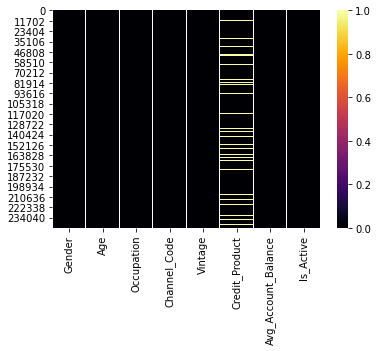

<Figure size 1152x648 with 0 Axes>

In [14]:
#NullValues with the help of Heatmap

sns.heatmap(Data.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))


<Figure size 1152x648 with 0 Axes>

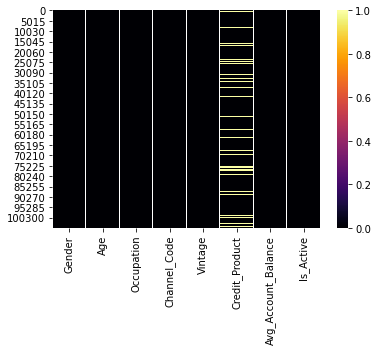

<Figure size 1152x648 with 0 Axes>

In [15]:
#NullValues with the help of Heatmap
sns.heatmap(Test.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))

In [16]:
pd.crosstab(Data1['Occupation'], Data1['Is_Lead'],normalize='columns')


Is_Lead,0,1
Occupation,,
Entrepreneur,0.004828,0.030229
Other,0.282676,0.294898
Salaried,0.322791,0.197228
Self_Employed,0.389704,0.477645


Self_Employed statistically have the highest chances of Lead 

In [17]:
pd.crosstab(Data1['Is_Active'], Data1['Is_Lead'],normalize='columns')


Is_Lead,0,1
Is_Active,,
No,0.634917,0.536697
Yes,0.365083,0.463303


In [18]:
pd.crosstab(Data1['Channel_Code'], Data1['Is_Lead'],normalize='columns')
#will set the order for encoding as per the approval rate

Is_Lead,0,1
Channel_Code,,
X1,0.502761,0.162675
X2,0.242850,0.380988
X3,0.232041,0.432662
X4,0.022349,0.023676


X3 and X2 are the most important group, while X-4 has slight chances of conversion 

In [19]:
pd.crosstab(Data1['Gender'], Data1['Is_Lead'],normalize='columns')

Is_Lead,0,1
Gender,,
Female,0.473882,0.389531
Male,0.526118,0.610469


In [20]:
#First sum and order all null values for each variable

percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False) 
dataType = Data.dtypes
null = Test.isnull().sum().sort_values(ascending=False)

missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables = missing_variables.head(19)
missing_variables


,Total,percent,Data Type
Credit_Product,12522,0.119341,object
Is_Active,0,0.000000,object
Avg_Account_Balance,0,0.000000,int64
Vintage,0,0.000000,int64
Channel_Code,0,0.000000,object
Occupation,0,0.000000,object
Age,0,0.000000,int64
Gender,0,0.000000,object


In [21]:
#First sum and order all null values for each variable
percent_test = (Test.isnull().sum()/Test.isnull().count()).sort_values(ascending=False) 
null_test = Test.isnull().sum().sort_values(ascending=False)

dataType_test = Test.dtypes
missing_variables_test = pd.concat([null_test, percent_test,dataType_test], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables_test = missing_variables_test.head(19)
missing_variables_test

,Total,percent,Data Type
Credit_Product,12522,0.118904,object
Is_Active,0,0.000000,object
Avg_Account_Balance,0,0.000000,int64
Vintage,0,0.000000,int64
Channel_Code,0,0.000000,object
Occupation,0,0.000000,object
Age,0,0.000000,int64
Gender,0,0.000000,object


Credit_product is the only feature from object ("category ") that has missing values 

In both Test and Train data set the Credit_product has many missing values

###  Feature analysis through plots


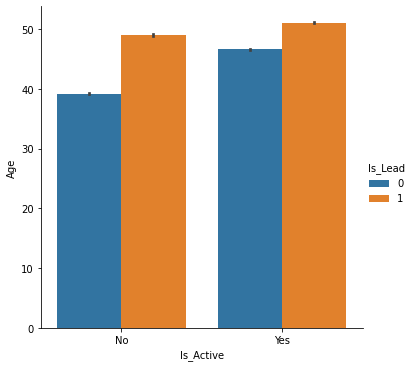

In [22]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="Is_Active", y="Age" , hue="Is_Lead",kind="bar",data=Data1)
plt.show()


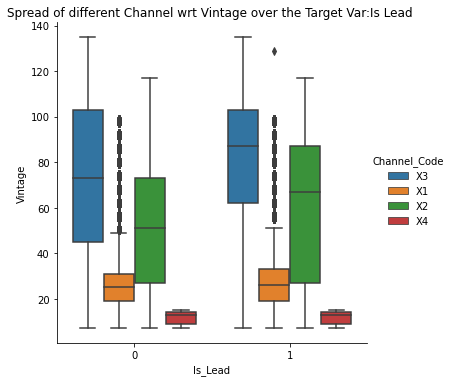

In [23]:
#variation of vintage on the Lead wrt to Channel divion the cx as per the bank records

sns.catplot(x="Is_Lead", y="Vintage", hue="Channel_Code", kind="box",data=Data1).set(title='Spread of different Channel wrt Vintage over the Target Var:Is Lead ')
plt.show()


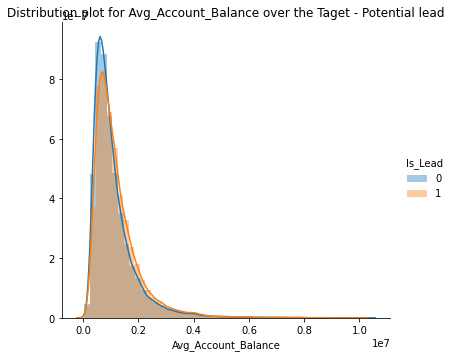

In [24]:
sns.FacetGrid(Data1,hue='Is_Lead',size=5).map(sns.distplot,'Avg_Account_Balance').add_legend().set(title='Distribution plot for Avg_Account_Balance over the Taget - Potential lead')
plt.show()

#Avg_Account_Balance is very skewd 

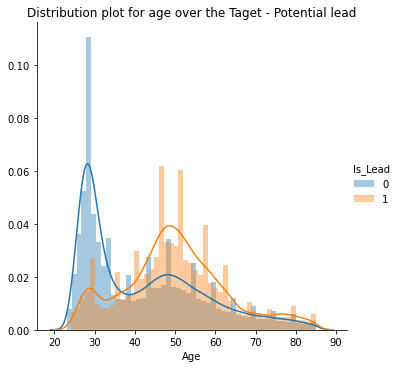

In [25]:
sns.FacetGrid(Data1,hue='Is_Lead',size=5).map(sns.distplot,'Age').add_legend().set(title='Distribution plot for age over the Taget - Potential lead')
plt.show()

Customers from the following group are the statistically potential range for  our target audience  :

1) Customers from from the age bracket of 30 to 55 years will be statistically important Age bracket for our target audience  


2) Customers who have a vintage period over the range of 2 years from all Acquisition Channels are a potential target 

3) The customers who are not having credit card earlier might show slight disinterest and might not be a potential target 

4) Customers from from the age bracket of 30 to 55 years 

In [26]:
def findind_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_values, outlier_indices 

In [27]:
indices,values = findind_outliers(Data['Age'])
print(np.sort(values))

[]


In [28]:
indices,values = findind_outliers(Data['Avg_Account_Balance'])
print(np.sort(values))

[    35     71    113 ... 245661 245676 245701]


In [29]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

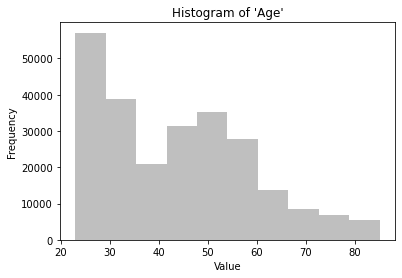

In [30]:
plot_histogram(Data['Age'])

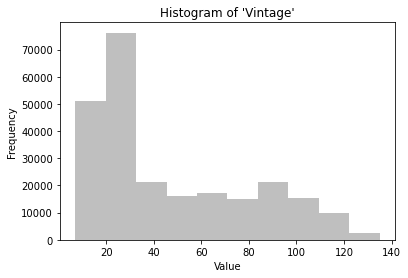

In [31]:
plot_histogram(Data['Vintage'])

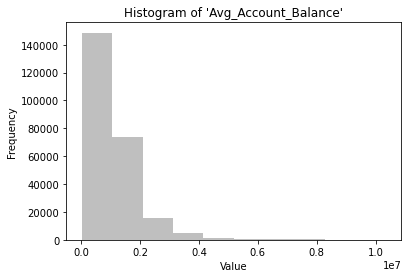

In [32]:
plot_histogram(Data['Avg_Account_Balance'])

In [33]:
#imputing for the DATA set which has teh target value so that depdence of both catagorical valused with imputed values can be viewed
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Data1['Credit_Product'] = imp.fit_transform(Data1[['Credit_Product']]).ravel()
Data1['Credit_Product']=pd.DataFrame(Data1['Credit_Product'])

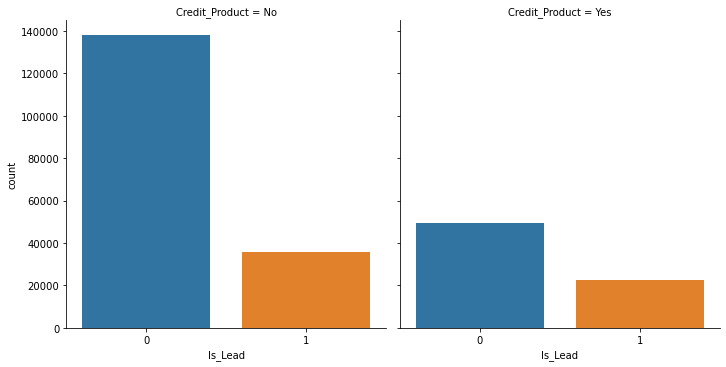

In [34]:
sns.factorplot("Is_Lead", col = "Credit_Product", data = Data1[Data1.Credit_Product.notnull()],kind = "count");
plt.show()

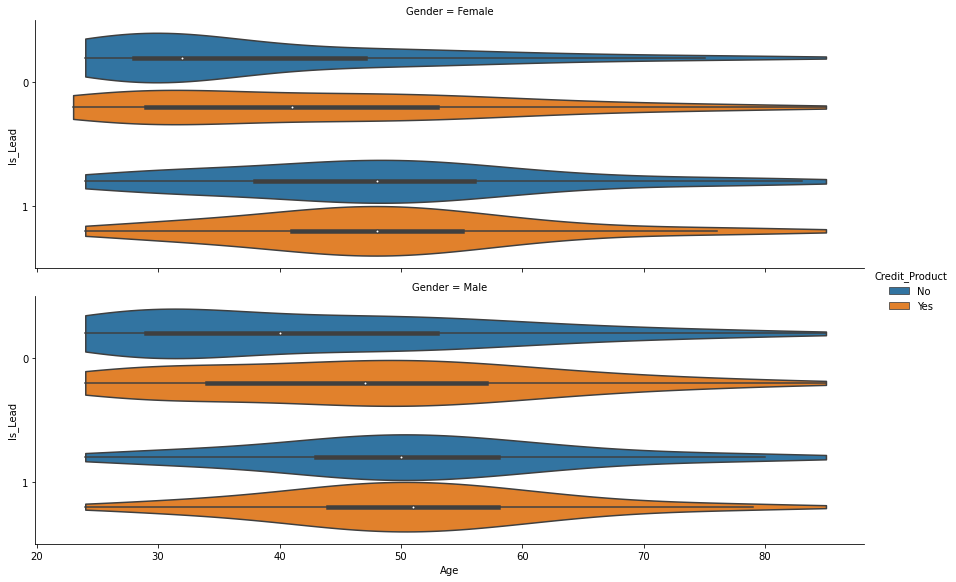

In [35]:
#Checking the spread Age and Gender for people who have credit card and are potential target

sns.catplot(x="Age", y="Is_Lead",
                hue="Credit_Product", row="Gender",
                data=Data1,
                orient="h", height=4, aspect=3,
                kind="violin", dodge=True, cut=0, bw=.5)
plt.show()

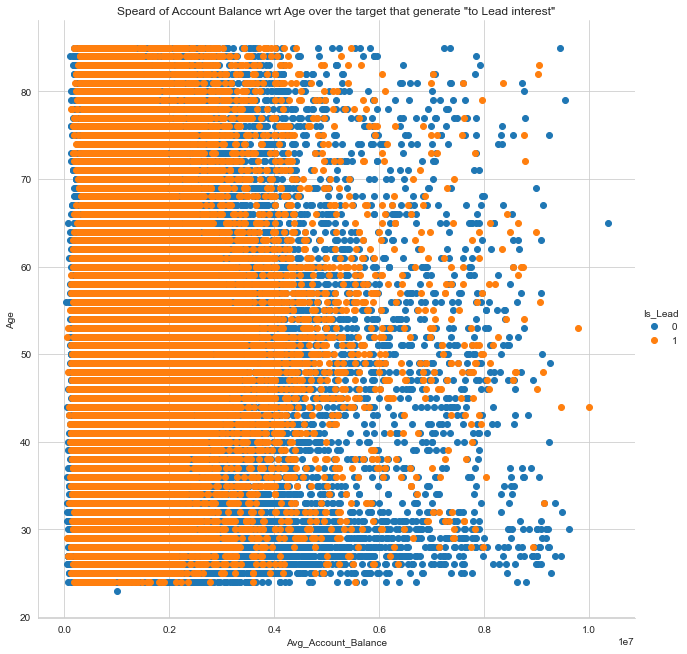

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(Data1, hue="Is_Lead", size=9) \
   .map(plt.scatter, "Avg_Account_Balance", "Age") \
   .add_legend()
plt.title('Speard of Account Balance wrt Age over the target that generate "to Lead interest"')
plt.show()

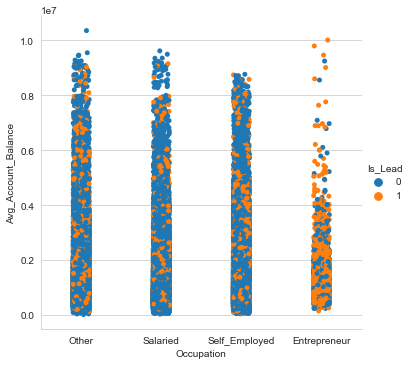

In [37]:
#checking the occupation type along with balance and which type has likiness of conversion for lead

sns.catplot(x="Occupation", y="Avg_Account_Balance", hue="Is_Lead",data=Data1)
plt.show()

From the above graph we can infer that the customers from all the age group and occupation sector who are having there savings in our bank in the past 12 Months around the range of "250000-785000" are are statistically interested, among them the occupation group who are Self_Employed statistically have the highest chances of Lead , while the  "Entrepreneur"(from all avg_account_balance) are most important target audience among the portienal lead potential lead.

In [38]:
#putting them in the frameowrk of datatype to do encoding after imputing , finind var and passing float and integer for imputing - TRAIN DATA

Categorical = Data.select_dtypes(include='object') 
IntegerData = Data.select_dtypes(include='int64') 


In [39]:
#putting them in the frameowrk of datatyp to do encoding after imputing , finind var and passing float and integer for imputing - Test DATA

Categorical_Test = Test.select_dtypes(include='object') 
IntegerData_Test = Test.select_dtypes(include='int64') 


In [40]:
#using the concept of VIF to check for redundant features 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIF = pd.DataFrame()
IntegerData['Intercept'] = 1
VIF['Independent Variables'] = IntegerData.columns
VIF['VIF'] = [vif(IntegerData.values, i) for i in range(IntegerData.shape[1])]
VIF = VIF.set_index('Independent Variables').drop(index = 'Intercept').T

In [41]:
VIF

Independent Variables,Age,Vintage,Avg_Account_Balance
VIF,1.666877,1.678781,1.031601


There are no multicollinearity among the Integer values 

In [42]:
IntegerData = IntegerData.drop(['Intercept'],axis=1)


In [43]:
#cross checking for collinearity with heatmap
m = np.ones_like(Data1.drop(columns = 'Is_Lead').corr())
m[np.tril_indices_from(m)]=0


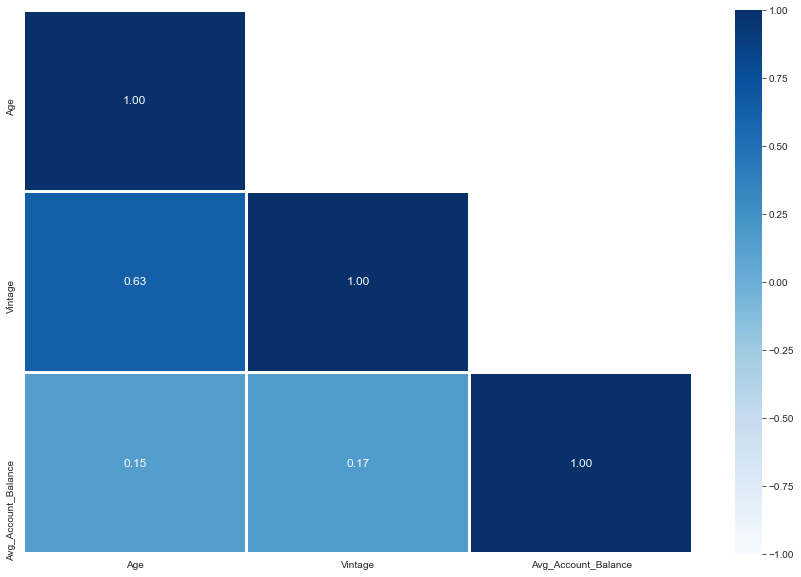

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(Data1.drop(columns = 'Is_Lead').corr(), annot= True, annot_kws= {'size' : 12},
           cmap = 'Blues', fmt = '.2f', linewidths= 2, linecolor='white', mask = m,vmin=-1)
plt.show();

In [45]:
Data.skew()

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
dtype: float64

### Data Cleaning

In [46]:
#imputing for the Test case dataset 

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Categorical_Test['Credit_Product'] = imp.fit_transform(Categorical_Test[['Credit_Product']]).ravel()
Categorical_Test['Credit_Product']=pd.DataFrame(Categorical_Test['Credit_Product'])


In [47]:
#imputing for the Test case dataset 

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Categorical['Credit_Product'] = imp.fit_transform(Categorical[['Credit_Product']]).ravel()
Categorical['Credit_Product']=pd.DataFrame(Categorical['Credit_Product'])

In [48]:
#encoding for the Train case dataset -one Hot encoding followed by one-hot as many features dont have order 

from sklearn.preprocessing import LabelEncoder

var_mod = ['Occupation', 'Channel_Code']
le = LabelEncoder()
for i in var_mod:
    Categorical[i] = le.fit_transform(Categorical[i])
    
#One Hot Coding:

from sklearn.preprocessing import OneHotEncoder

Categorical = pd.get_dummies(Categorical, columns=['Credit_Product', 'Is_Active', 'Gender'], drop_first=True)

In [49]:
#encoding for the Train case dataset -one Hot encoding followed by one-hot as many features dont have order 


var_mod = ['Occupation', 'Channel_Code']
le = LabelEncoder()
for i in var_mod:
    Categorical_Test[i] = le.fit_transform(Categorical_Test[i])
    
#One Hot Coding:

from sklearn.preprocessing import OneHotEncoder

Categorical_Test = pd.get_dummies(Categorical_Test, columns=['Credit_Product', 'Is_Active', 'Gender'], drop_first=True)

In [50]:
for i in IntegerData:
    IntegerData[i] = np.log(IntegerData[i])

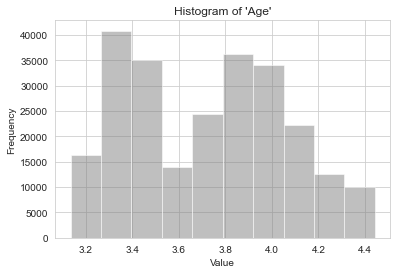

In [51]:
#addressing the skewness
plot_histogram(IntegerData['Age'])

In [52]:
features = pd.concat([Categorical,IntegerData],axis=1)
features_Test = pd.concat([Categorical_Test,IntegerData_Test],axis=1)


In [53]:
features.skew()

Occupation            -0.303374
Channel_Code           0.386726
Credit_Product_Yes     0.908636
Is_Active_Yes          0.458036
Gender_Male           -0.185298
Age                    0.142820
Vintage                0.109663
Avg_Account_Balance    0.235178
dtype: float64

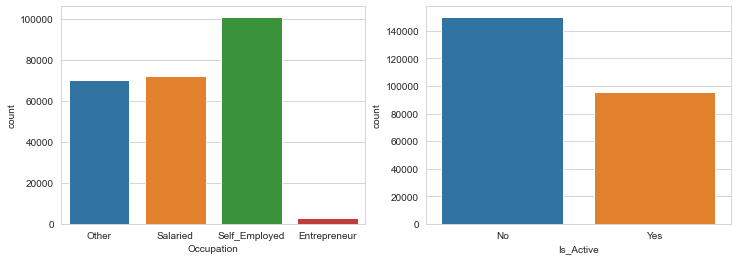

In [54]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Occupation", data=Data1, ax=axes[0])
sns.countplot(x="Is_Active", data=Data1, ax=axes[1]);

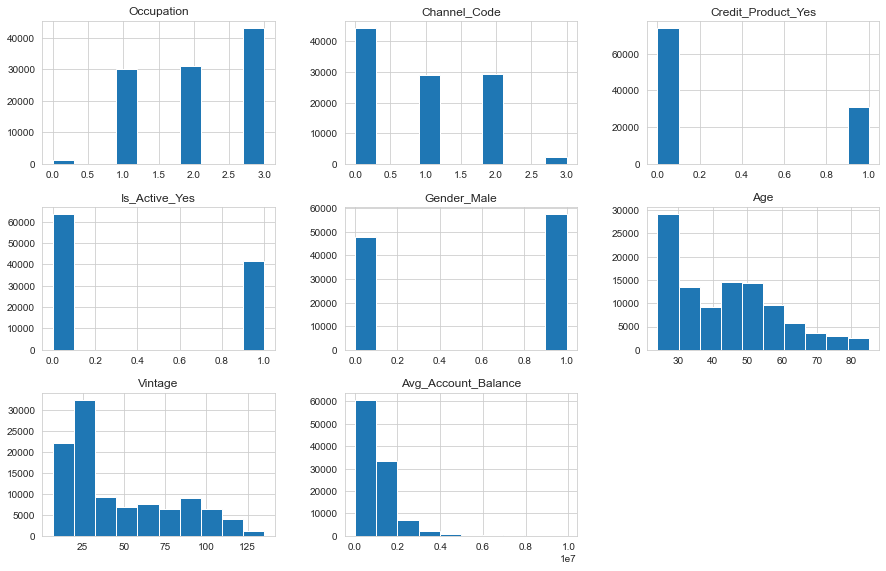

In [55]:
#checking the distribution of the test data before delopyment 

figsize=(15,30)
features_Test.hist(figsize=(15,30),layout=(9,3))
plt.show()

###  Model selection and  performance


In [56]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [57]:
#data is unbalanced, we can fix this with SMOTE and its better to split after train-test split to prevent any data leakgage  : https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction

from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=34)

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
features_Test = sc.fit_transform(features_Test)
features_Test = pd.DataFrame(features_Test)

DecisionTreeClassifier

In [59]:
classifier1 = DecisionTreeClassifier(max_depth=3)
classifier1.fit(X_train,y_train)
y_predict = classifier1.predict(X_test)
DecisionTree=roc_auc_score(y_test,y_predict)*100


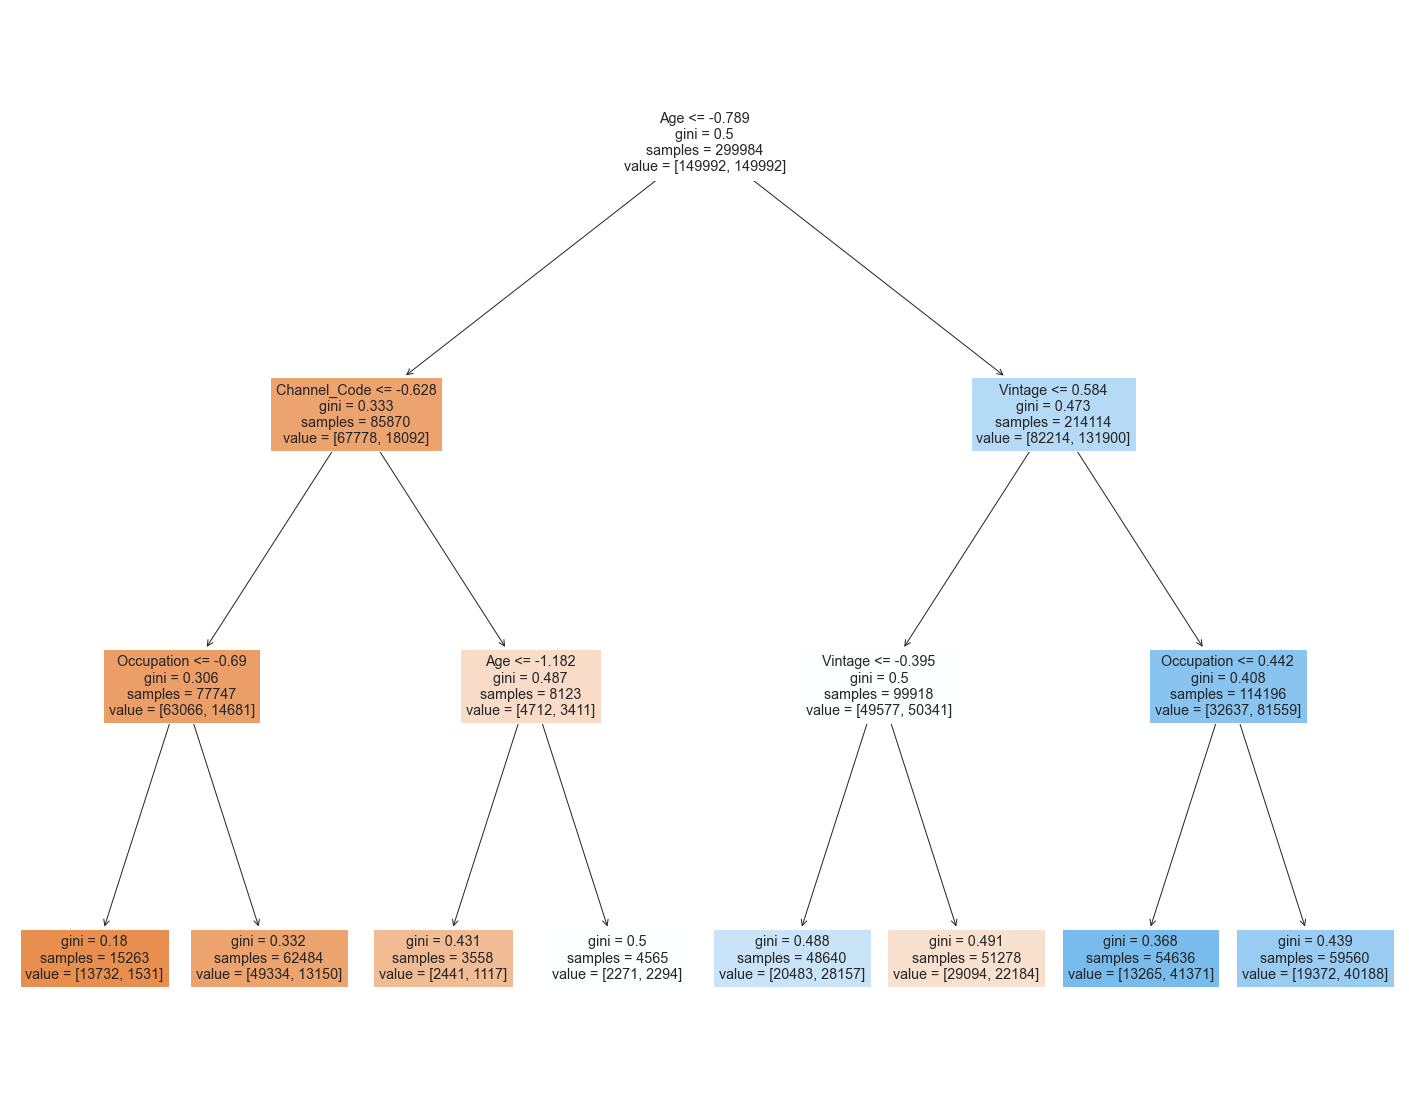

In [60]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier1,feature_names=features.columns,filled=True)

Random-Forest_classifier with 50 n_estimators

In [61]:
rfc=RandomForestClassifier(n_estimators=50) 
rfc.fit(X_train,y_train)
y_predict_rfc = rfc.predict(X_test)
#if the accuracy is less than decision tree, then consider the model alone
Random_Forest=roc_auc_score(y_test,y_predict_rfc)*100


AdaBoostClassifier

In [62]:
classifier = AdaBoostClassifier(n_estimators=50)
classifier.fit(X_train, y_train)
predictions_ada = classifier.predict(X_test)
AdaBoost=roc_auc_score(y_test,predictions_ada)*100

GaussianNB 

In [63]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_preds_gnb = gnb.predict(X_test)
Gaussian=roc_auc_score(y_test,y_preds_gnb)*100


LogisticRegression

In [64]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)*100
Logistic=roc_auc_score(y_test,predictions)*100


In [65]:
## function to get confusion matrix in a proper format
def draw_cm( y_test, predicted ):
    cm = confusion_matrix( y_test, predictions)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

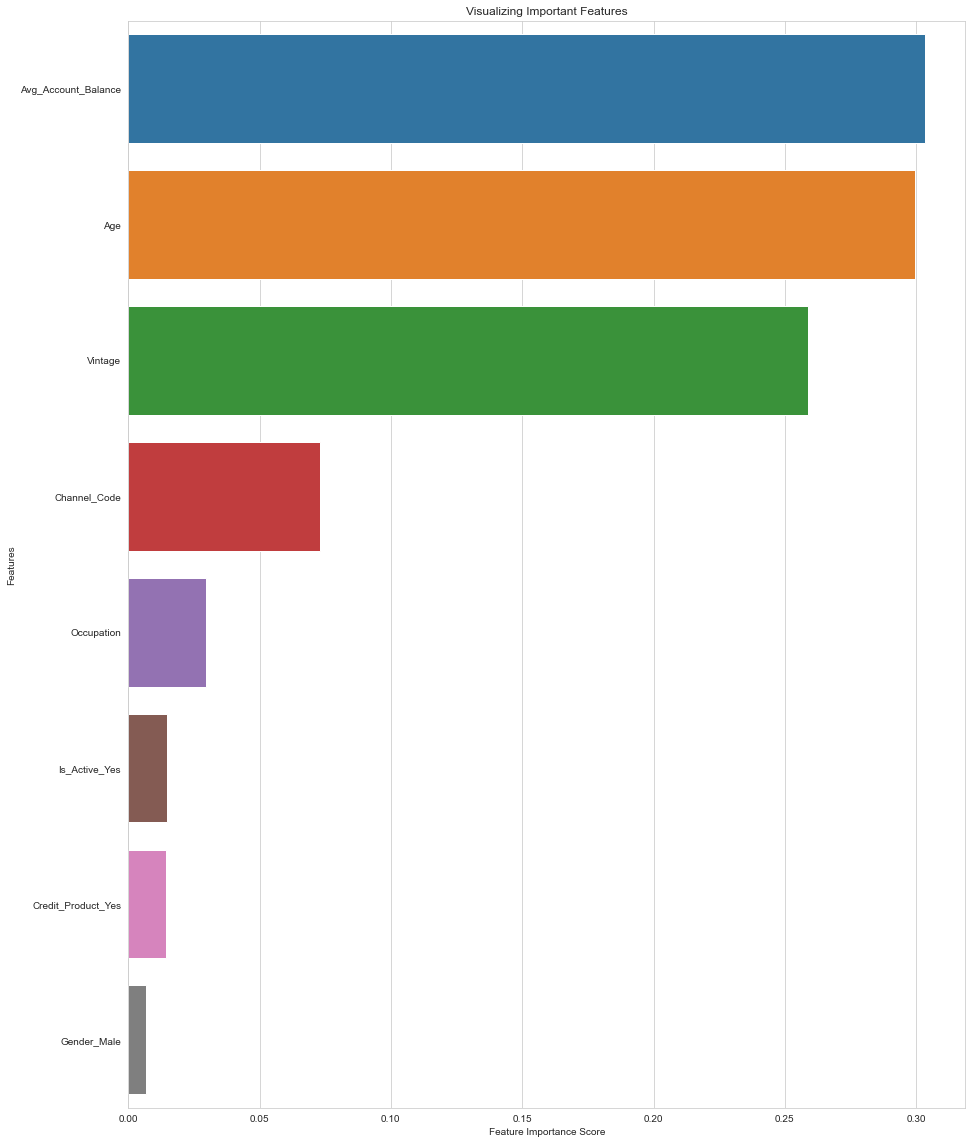

In [66]:
feature_imp = pd.Series(rfc.feature_importances_,index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(15,20))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

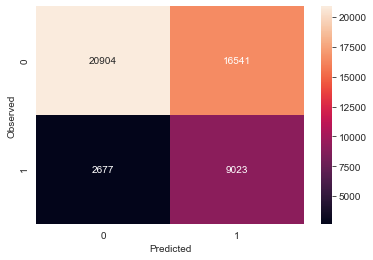

In [67]:
draw_cm(y_test,predictions_ada);

In [68]:
name =['Logistic','Gaussian','AdaBoost','RandomForest','DecisionTree']
Results_Split = [Logistic,Gaussian,AdaBoost,Random_Forest,DecisionTree]


In [69]:
Results_with_Train_Test = list(zip(name,Results_Split))

In [70]:
Results_with_Train_Test

[('Logistic', 66.47276803699557),
 ('Gaussian', 66.81610921088821),
 ('AdaBoost', 67.28760643816058),
 ('RandomForest', 58.40417740891769),
 ('DecisionTree', 66.27507980365505)]

In [71]:
models = []
models.append(('LogisticRegression', logmodel))
models.append(('DecisionTreeClassifier', classifier1 ))
models.append(('GaussianNB', gnb ))
models.append(('AdaBoostClassifier', classifier))
names = []
results = []

In [72]:
#The 10-fold cross validation procedure is used to evaluate each algorithm,same random seed to ensure that the same splits happen
scoring = 'accuracy'
for name, model in models:

    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, features, target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.759609 (0.001362)
DecisionTreeClassifier: 0.770150 (0.005948)
GaussianNB: 0.698753 (0.001392)
AdaBoostClassifier: 0.782021 (0.001587)


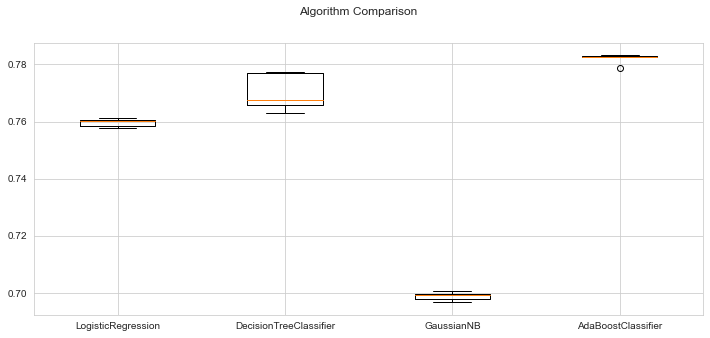

In [73]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [74]:
!pip install xgboost
import xgboost as xgb
#change the data to a Dmatrix 

D_train  = xgb.DMatrix(X_train, label = y_train)
D_test = xgb. DMatrix(X_test)
#features_Test = xgb. DMatrix(features_Test)

#the bojective must be set as per the problem statement , in this case multi:softmax is for classififcationa and takes the value for num_class 
param = {
       'eta' : 0.3,
    'max_depth' : 3,
    'objective': 'multi:softmax',
    'num_class' : 2
}

model = xgb.train(param, D_train, 20)
y_pred = model.predict(D_test)

[11:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
KNeighborsClassifier

sklearn.neighbors._classification.KNeighborsClassifier

In [77]:
params = {
    'n_neighbors' : [5,25],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']   
    
}

### Among all the models the AdaBoostClassifier seems the best


In [78]:

model = classifier

#model.fit(X_train,y_train)

y_pred_test = model.predict(features_Test)

y_pred_test  = y_pred_test.astype(int)

submission=pd.DataFrame()

sample_submission = pd.read_csv('sample_submission_eyYijxG.csv')

submission['ID']= sample_submission.ID

submission['Is_Lead']=y_pred_test


FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission_eyYijxG.csv'

In [ ]:
chootu = sample_submission['Is_Lead']

In [ ]:
## function to get confusion matrix in a proper format
def draw_cm( chootu, y_pred_test ):
    cm = confusion_matrix( chootu, y_pred_test)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
draw_cm(chootu,y_pred_test);

In [ ]:
(70101)/(70101+35211)*100


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test ,predictions_ada)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:

submission.to_csv('Lead Prediction.csv',index=False)